In [133]:
# Imports
import numpy as np
import matplotlib.pyplot as pp
from IPython.core.pylabtools import figsize
import warnings
warnings.filterwarnings('ignore')
figsize(10,10)

In [264]:
# Setting model parameters
Du = 0.01
Dv = 2.0
c = 0.01
e = 0.02
S = 0.06
k = 0.65
gamma = 15000

In [265]:
# Setting simulation parameters
#? needs fixing
size = 200
dx = 2./size
T = 10.
dt = .00001
n = int(T/dt)

In [266]:
U = np.random.rand(size,size)*0.02
V = np.random.rand(size,size)*0.02

In [267]:
def show_patterns(U, ax=None):
    ax.imshow(U, cmap=pp.cm.bone_r,
              interpolation='none',
              extent=[-1, 1, -1, 1])
    ax.set_axis_off()

In [268]:
def laplacian(Z):
    Ztop = Z[0:-2,1:-1]
    Zleft = Z[1:-1,0:-2]
    Zbottom = Z[2:,1:-1]
    Zright = Z[1:-1,2:]
    Zcenter = Z[1:-1,1:-1]
    return (Ztop+Zleft+Zbottom+Zright-4*Zcenter)/dx**2

In [269]:
def rk2(U,V,dx,dt):
    # Laplacian of U and V: use U+u1, V+v1 for u2/v2
    
    # Discard borders
    Uc = U[1:-1, 1:-1]
    Vc = V[1:-1, 1:-1]
    
    # Calculate stencils
    u1 = dt*((Du/Dv) * laplacian(U) + gamma * (Uc**2/(np.ones(Uc.shape)+k*Uc**2)/Vc - c*Uc))
    v1 = dt*(laplacian(V) + gamma*(Uc**2 - e*Vc + np.full(Vc.shape,S)))
    
    u2 = (Du/Dv) * laplacian(U) + gamma * ((Uc+u1/2)**2/(np.ones(Uc.shape)+k*(Uc+u1/2)**2)/(Vc+v1/2) - c*(Uc+u1/2))
    v2 = laplacian(V) + gamma*((Uc+u1/2)**2 - e*(Vc+v1/2) + np.full(Vc.shape,S))
    
    U[1:-1, 1:-1], V[1:-1, 1:-1] = Uc+dt*u2, Vc+dt*v2
    
    # Neumann boundary conditions: du/dx=0
    for Z in (U, V):
        Z[0, :] = Z[1, :]
        Z[-1, :] = Z[-2, :]
        Z[:, 0] = Z[:, 1]
        Z[:, -1] = Z[:, -2]
    return U,V

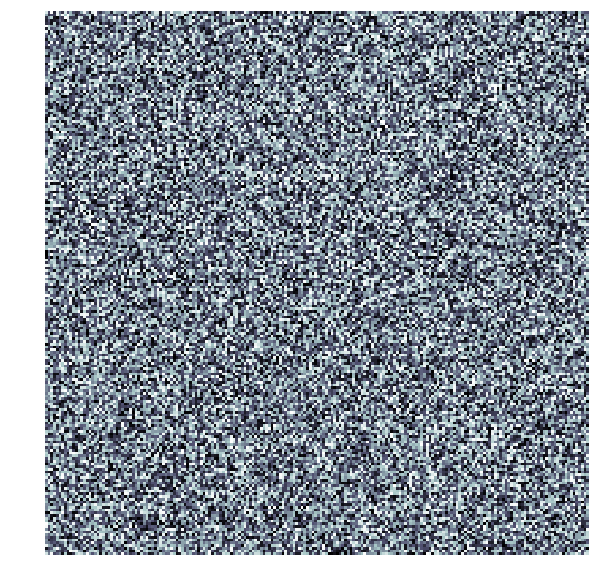

In [270]:
pp.close("all")
fig,ax = pp.subplots(1,1)
show_patterns(U,ax)
fig

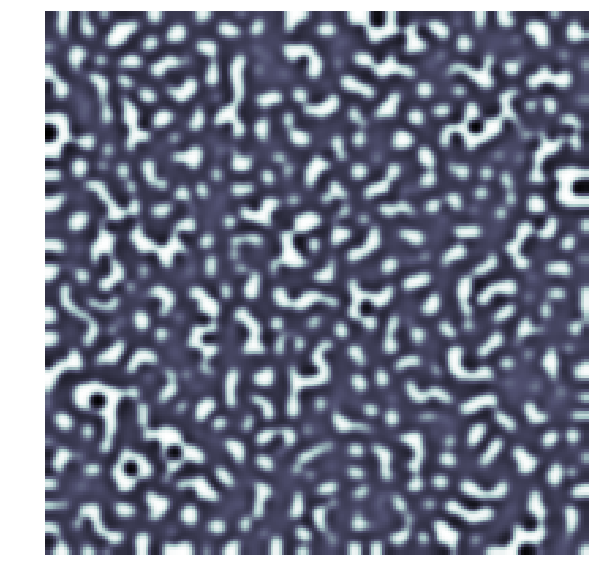

In [271]:
# Simulation for n timesteps
for i in range(10000):
    U,V = rk2(U,V,dx,dt)
#U,V = finite_difference(U,V,dx,dt)
pp.close("all")
fig,ax = pp.subplots(1,1)
show_patterns(U,ax)
fig